# heart disease EDA
- 학번 : 30102
- 이름 : 이예령

## 1. 주제
- 질문 1 : 이 데이터셋에서 나이가 심장병과 어떤 관련이 있는가?
- 질문 2 : 이 데이터셋에서 성별이 심장병과 어떤 관련이 있는가?
- 질문 3 : 이 데이터셋에서 심장병 진단과 상관관계가 깊은 칼럼과는 어떤 관계가 있는가? 
- ① 가슴 통증 ② 최대 심박동수 ③ ST의 최대 기울기
- 질문 4 : 이 데이터셋에서 서로 상관관계가 깊은 칼럼들은 심장병 진단과 어떤 관계가 있는가? 
- ① 평상시 혈압 - 나이 ② 나이 - 형광 투시된 혈관 ③ 최대 심박동수 - 가슴 통증 ④ 최대 심박동수 - ST의 최대 기울기

## 2. 데이터 수집
- 데이터 수집 방법 : 데이터 사이언스 커뮤니티(Kaggle)에서 평소 관심을 가진 데이터셋 사용
- 데이터 수집 사이트 : https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
# 라이브러리, 데이터 가져오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

df = pd.read_csv('heart.csv')

## 3. 탐색적 데이터 분석 과정

#### 표를 활용하여 분석하기

In [2]:
# 상위 10행 출력

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# 구조 확인 

df.shape

(303, 14)

In [4]:
# 변수 확인

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

- 변수 설명

#### age : 나이
#### sex : 성별 (0 : 여성, 1 : 남성)
#### cp : 흉통 유형 (0 : 증상 없음, 1 : 비전형적 협심증, 2 : 비협심증 통증, 3 : 전형적인 협심증)
#### trestbps : 안정된 평상시 혈압
#### chol : 혈중 콜레스테롤 농도
#### fbs : 공복시 혈당 > 120mg/dl (0 : False, 1 : True)
#### restecg : 안정 심전도 결과 (0 : 좌심실 비대, 1: 정상, 2 : ST-T파 비정상)
#### thalach : 최대 심장 박동 수
#### exang : 협심증 유발 운동 (0 : No, 1 : Yes)
#### oldpeak : 안정되기까지 운동으로 유발되는 ST
#### slope : ST의 최대 기울기 (0 : 하강, 1 : 평면, 2 : 상승) - 급성 심근경색 유발 요소
#### ca : 형광 투시된 주요 혈관의 수 (0~3)
#### thal : 결함 (1 : 고정된 결함, 2 : 정상, 3: 가역적 결함)
#### target : 심장병 진단 (0 : False, 1 : True)

In [5]:
# 메타 데이터 조회

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# 데이터 분포도 확인

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# ca = 4, thal = 0은 잘못된 데이터이므로 평균값 넣고 자료형 맞춰주기

df.loc[df['ca'] == 4, 'ca'] = np.NaN
df.loc[df['thal'] == 0, 'thal'] = np.NaN
df
df = df.fillna(df.median())
df = df.astype({'ca' : 'int', 'thal' : 'int'})

#### 그래프를 활용하여 분석하기

C:\Users\yrlee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yrlee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


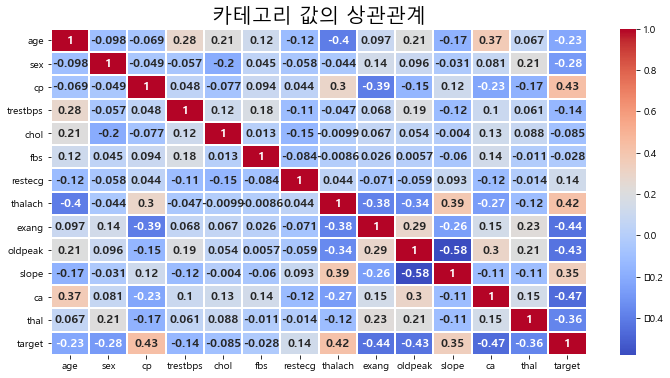

In [8]:
# 두 카테고리 값에 대한 값 변화를 알기 위해 heatmap 사용

plt.figure(figsize=(12, 6))
plt.title("카테고리 값의 상관관계", fontsize = 20)
sns.heatmap(df.corr(), annot = True, linewidths = 1, 
            annot_kws = {'size' : 12, 'weight' : 'bold'}, cmap = 'coolwarm')
plt.show()

In [9]:
# 그래프를 이해하기 쉽게 범주형 데이터 문자화
# 범주형 데이터를 문자화했기 때문에 몇몇 행을 재실행하는 경우 첫 실행과 결과가 달라질 수 있음

df['sex'] = df['sex'].map({0 : '여성', 1 : '남성'})
df['cp'] = df['cp'].map({0 : '증상 없음', 1 : '비전형적 협심증', 
                         2 : '비협심증 통증', 3 : '전형적인 협심증'})
df['fbs'] = df['fbs'].map({0 : '120mg/dl 이하', 1 : '120mg/dl 이상'})
df['restecg'] = df['restecg'].map({0 : '좌심실 비대', 1 : '정상', 
                         2 : 'ST-T파 비정상'})
df['exang'] = df['exang'].map({0 : '협심증 유발 운동 X', 
                               1 : '협심증 유발 운동 O'})
df['slope'] = df['slope'].map({0 : '하강', 1 : '평면', 2 : '상승'})
df['thal'] = df['thal'].map({1 : '고정된 결함', 2 : '정상', 3: '가역적 결함'})
df['target'] = df['target'].map({0 : '심장병 X', 1 : '심장병 O'})

df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,남성,전형적인 협심증,145,233,120mg/dl 이상,좌심실 비대,150,협심증 유발 운동 X,2.3,하강,0,고정된 결함,심장병 O
1,37,남성,비협심증 통증,130,250,120mg/dl 이하,정상,187,협심증 유발 운동 X,3.5,하강,0,정상,심장병 O
2,41,여성,비전형적 협심증,130,204,120mg/dl 이하,좌심실 비대,172,협심증 유발 운동 X,1.4,상승,0,정상,심장병 O
3,56,남성,비전형적 협심증,120,236,120mg/dl 이하,정상,178,협심증 유발 운동 X,0.8,상승,0,정상,심장병 O
4,57,여성,증상 없음,120,354,120mg/dl 이하,정상,163,협심증 유발 운동 O,0.6,상승,0,정상,심장병 O


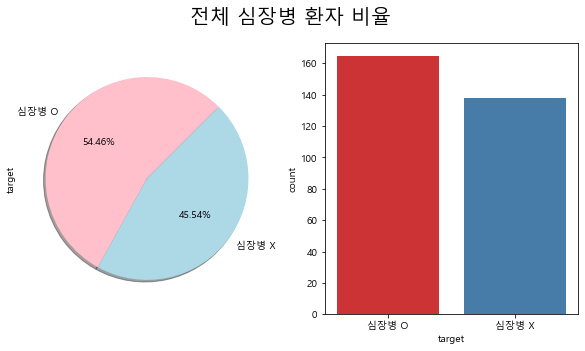

In [10]:
# pie, countplot로 전체 심장병 환자 비율 분석

figure, ax = plt.subplots(figsize = (10, 5), ncols = 2)
plt.suptitle("전체 심장병 환자 비율", fontsize = 20)

df['target'].value_counts().plot.pie(autopct='%1.2f%%', 
    colors = ['pink', 'lightblue'], shadow = True, startangle = 45, ax = ax[0])
sns.countplot(x = df['target'], data = df, ax = ax[1], palette = 'Set1')
plt.show()

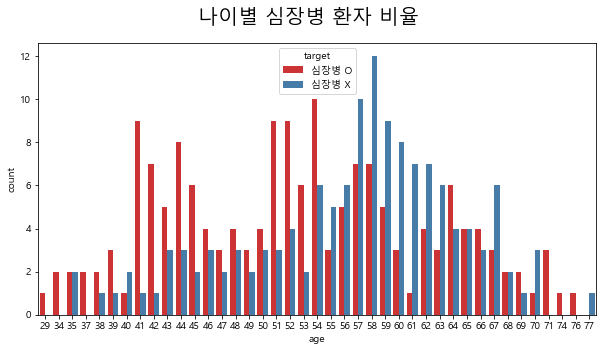

In [11]:
# countplot으로 나이별 심장병 환자 분석

figure = plt.subplots(figsize = (10, 5))
plt.suptitle("나이별 심장병 환자 비율", fontsize = 20)

sns.countplot(x = df['age'], hue = df['target'], data = df, palette = 'Set1')

plt.show()

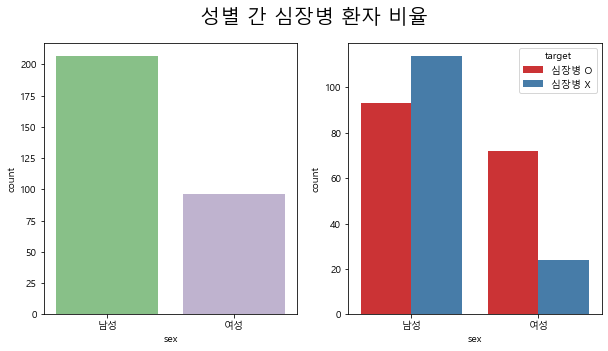

In [12]:
# countplot으로 성별 간 심장병 환자 비율 분석

figure, ax = plt.subplots(figsize = (10, 5), ncols = 2)
plt.suptitle("성별 간 심장병 환자 비율", fontsize = 20)

sns.countplot(x = df['sex'], palette = 'Accent', data = df, ax = ax[0])
sns.countplot(x = df['sex'], hue = df['target'], palette = 'Set1', 
              data = df, ax = ax[1])

plt.show()

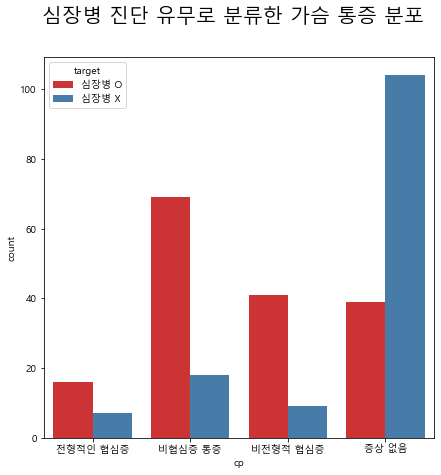

In [13]:
# countplot으로 가슴 통증과 심장병 진단과의 관계 분석

figure = plt.subplots(figsize=(7, 7))
plt.suptitle("심장병 진단 유무로 분류한 가슴 통증 분포", fontsize = 20)

sns.countplot(x = df['cp'], hue = df['target'], data = df, palette = 'Set1')
plt.show()

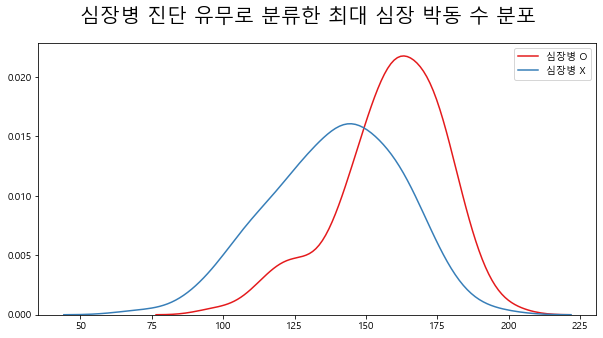

In [20]:
# kdeplot으로 최대 심장 박동 수와 심장병 진단과의 관계 분석

figure = plt.subplots(figsize = (10, 5))
plt.suptitle("심장병 진단 유무로 분류한 최대 심장 박동 수 분포", fontsize = 20)

color = sns.set_palette(palette = 'Set1')
sns.kdeplot(df[df['target'] == '심장병 O']['thalach'], color = color)
sns.kdeplot(df[df['target'] == '심장병 X']['thalach'], color = color)

plt.legend(['심장병 O', '심장병 X'])
plt.show()

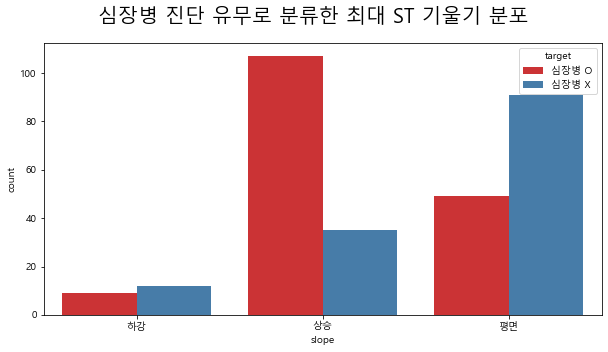

In [15]:
# countplot으로 가슴 통증과 심장병 진단과의 관계 분석

figure = plt.subplots(figsize = (10, 5))
plt.suptitle("심장병 진단 유무로 분류한 최대 ST 기울기 분포", fontsize = 20)

sns.countplot(x = df['slope'], hue = df['target'], data = df, palette = 'Set1')

plt.show()

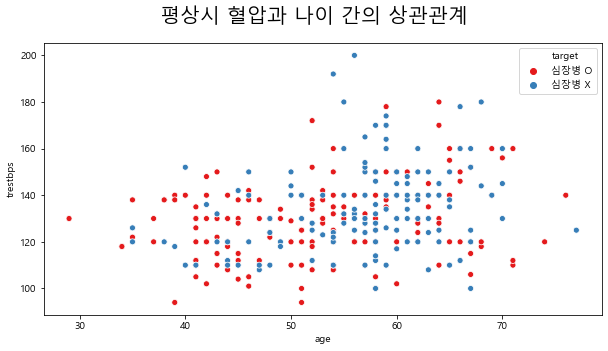

In [16]:
# scatterplot으로 평상시 혈압과 나이 간의 상관관계를 심장병 진단 유무로 분류

figure = plt.subplots(figsize = (10, 5))
plt.suptitle("평상시 혈압과 나이 간의 상관관계", fontsize = 20)

sns.scatterplot(x = df['age'], y = df['trestbps'], hue = df['target'], 
              data = df, palette = 'Set1')

plt.show()

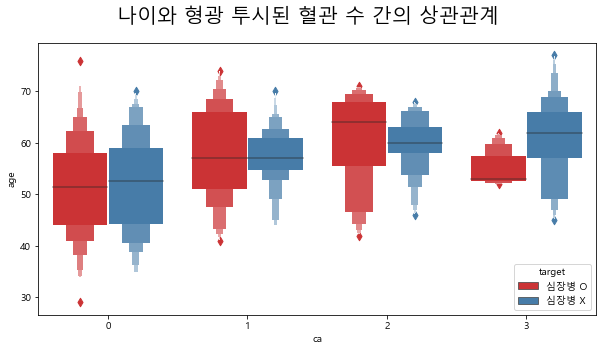

In [17]:
# scatterplot으로 나이와 형광 투시된 혈관 수 간의 상관관계를 
# 심장병 진단 유무로 분류

figure = plt.subplots(figsize = (10, 5))
plt.suptitle("나이와 형광 투시된 혈관 수 간의 상관관계", fontsize = 20)

sns.boxenplot(x = df['ca'], y = df['age'], hue = df['target'], 
              data = df, palette = 'Set1')


plt.show()

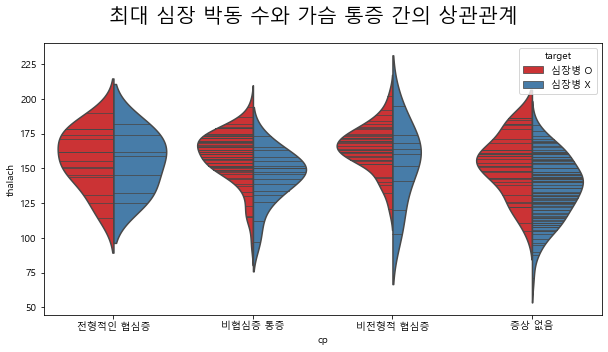

In [18]:
# violinplot으로 최대 심장 박동 수와 가슴 통증 간의 상관관계를 
# 심장병 진단 유무로 분류

figure = plt.subplots(figsize = (10, 5))
plt.suptitle("최대 심장 박동 수와 가슴 통증 간의 상관관계", fontsize = 20)

sns.violinplot(x = df['cp'], y = df['thalach'], hue = df['target'], 
              data = df, split = True, inner = 'stick', palette = 'Set1')

plt.show()

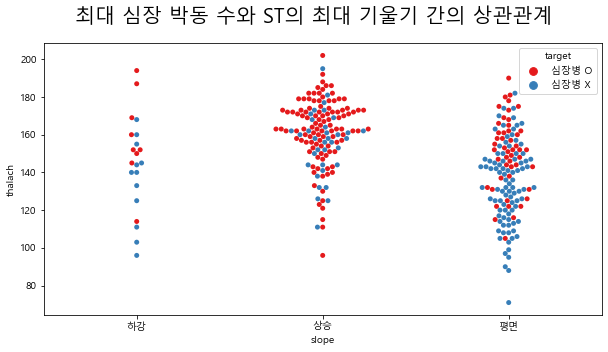

In [19]:
# violinplot으로 최대 심장 박동 수와 ST의 최대 기울기 간의 상관관계를 
# 심장병 진단 유무로 분류

figure = plt.subplots(figsize = (10, 5))
plt.suptitle("최대 심장 박동 수와 ST의 최대 기울기 간의 상관관계", fontsize = 20)

sns.swarmplot(x = df['slope'], y = df['thalach'], hue = df['target'], 
              data = df, palette = 'Set1')

plt.show()

## 4. 결론
- 질문에 대한 답

- 심장병 진단 수 : 전체 심장병이 있는 환자의 비율은 심장병이 있는 환자가 54.46%, 심장병이 없는 환자의 비율이 45.54%였다.


- 질문 1 : 나이가 심장병과 어떤 관련이 있는가?
- 답변 1 : 심장병 진단을 받은 사람들의 그래프가 40대 초반 ~ 50대 초반에서 더 높고, 심장병 진단을 받지 않은 사람들의 그래프가 50대 후반 ~ 60대 초반에서 더 높기 때문에 40대 초반 ~ 50대 초반인 사람이 심장병에 걸릴 확률이 높다는 가설을 세울 수 있다.


- 질문 2 : 성별이 심장병과 어떤 관련이 있는가?
- 답변 2 : 심장병이 있는 사람과 없는 사람의 수가 모두 남성이 절대적으로 더 많은데, 심장병이 있는 남성의 수와 여성의 수가 얼마 차이나지 않는 것으로 보아 여성이 심장병에 걸릴 확률이 높다는 가설을 세울 수 있다.


- 질문 3.1 : 심장병 진단과 상관관계가 깊은 가슴 통증과는 어떤 관계가 있는가?
- 답변 3.1 : 심장병 진단을 받지 않은 경우 증상 없음이 대부분이었고 심장병 진단을 받은 경우 가슴 통증이 다양하게 분포된 것을 보아 가슴 통증이 있는 경우 심장병에 걸릴 확률이 높다는 가설을 세울 수 있다.


- 질문 3.2 : 심장병 진단과 상관관계가 깊은 최대 심장 박동 수와는 어떤 관계가 있는가?
- 답변 3.2 : 심장병 진단을 받지 않은 경우 최대 심장 박동 수 분포의 최고점이 심장병 진단을 받은 사람의 경우보다 낮은 것으로 보아 최대 심장 박동 수가 높을수록 심장병에 걸릴 확률이 높다는 가설을 세울 수 있다.


- 질문 3.3 : 심장병 진단과 상관관계가 깊은 ST의 최대 기울기와는 어떤 관계가 있는가?
- 답변 3.3 : 평면인 경우가 가장 좋은 상태이고, 상승인 경우가 가장 좋지 않은 상태인데 심장병 진단을 받은 경우 중 상승인 데이터가 월등하게 많고, 평면인 경우 중 심장병 진단을 받지 않은 경우가 많은 것으로 보아 ST의 최대 기울기가 상승일수록 심장병에 걸릴 확률이 높다는 가설을 세울 수 있다.


- 질문 4.1 : 평상시 혈압과 나이 간의 상관관계는 심장병 진단과 어떤 관계가 있는가?
- 답변 4.1 : 심장병이 없는 50대 중반이 평상시 혈압이 제일 높고, 심장병 진단을 받지 않은 경우에도 평상시 혈압이 높은 데이터가 많다. 반면에, 40대~50대 중 심장병 진단을 받은 경우 평상시 혈압이 오히려 150mmHg을 넘어가지 않는 경우가 많아 평상시 혈압과 나이 간의 상관관계는 유의미한 경향성이 없는 것으로 볼 수 있다.


- 질문 4.2 : 나이와 형광 투시된 혈관 수 간의 상관관계는 심장병 진단과 어떤 관계가 있는가?
- 답변 4.2 : 심장병 진단을 받지 않은 경우 형광 투시된 혈관 수가 3개인 데이터가 매우 많고, 심장병 진단을 받은 경우와 받지 않은 경우의 형광 투시된 혈관 수가 0개인 데이터의 비율이 매우 비슷하다. 또한 형광 투시된 혈관의 수가 0개일 때는 평균이 50세 초반, 1개일 때는 50대 후반, 2개일 때는 60대 중반, 3개일 때는 50대 초반으로 아무런 경향이 없다. 그렇기 때문에 나이와 형광 투시된 혈관 간의 상관관계는 유의미한 경향성이 없는 것으로 볼 수 있다. 


- 질문 4.3 : 최대 심장 박동 수와 가슴 통증 간의 상관관계는 심장병 진단과 어떤 관계가 있는가?
- 답변 4.3 : 가슴 통증이 없고 심장병 진단을 받지 않은 경우 최대 심장 박동 수의 평균이 약 150mmHg로 가장 낮고, 가슴 통증이 있고 심장병 진단을 받은 경우는 모두 150mmHg 이상임을 알 수 있다. 가슴 통증이 있고 최대 심장 박동 수가 높은 경우 심장병에 걸릴 확률이 높다는 가설을 세울 수 있다.


- 질문 4.4 : 최대 심장 박동 수와 ST 최대 기울기 간의 상관관계는 심장병 진단과 어떤 관계가 있는가?
- 답변 4.4 : ST의 최대 기울기가 평면이고 심장병 진단을 받지 않은 사람들의 분포가 ST의 최대 기울기가 상승이고 심장병 진단을 받은 사람들의 분포보다 아래에 위치했음을 알 수 있다. ST의 최대 기울기가 상승이고 최대 심장 박동 수가 높은 경우 심장병에 걸릴 확률이 높다는 가설을 세울 수 있다. 

- 추론 : 심장병 진단과 상관관계가 깊은 칼럼들은 서로 간의 상관관계도 유의미한 가설을 유추할 수 있는데, 심장병 진단과 상관관계가 얕은 칼럼들은 아무런 경향성을 나타내지 않았다. 또한 여성이고, 나이가 40대 초반~50대 초반이고, 가슴 통증이 있고, 최대 심장 박동 수가 높고, ST의 최대 기울기가 상승일수록 심장병에 걸릴 확률이 높다.

- 느낌 : 인공지능에 관심이 많고 동아리에서나 개인적으로도 조금 공부해봤지만, pandas, matlibplot, seaborn과 같은 데이터 분석 라이브러리는 잘 다뤄보지 않아서 조금 생소했다. 예전부터 의료 관련 데이터를 분석해보고 싶다는 생각을 했어서 처음에는 공공데이터포털의 국립암센터의 암검진자 데이터를 분석하려고 했었다. 하지만 사이트의 도메인 변경으로 인해 당분간 관련 데이터를 사용할 수 없어 고민하다가 Kaggle의 heart disease UCI가 떠올랐다. 관련 예제도 많아서 오류나 막히는 부분이 있을 때 참고할 수 있는 자료가 많아 이 데이터셋으로 분석을 하게 되었다. 그래도 pandas나 matlibplot은 수업 때 들어서 조금 알고 있었지만, seaborn은 정말 생소해서 그래프의 특성을 하나씩 찾아가며 알아가고 각 칼럼에 직접 적용해보며 사용법을 터득했다. 프로젝트를 마무리한 지금은 seaborn을 어느 정도 다룰 수 있게 되어서 뿌듯하고, 데이터 분석 프로젝트는 처음이었지만 잘 마무리한 것 같아 마음에 든다. 다음에는 데이터 분석으로 끝내는 것이 아니라 머신러닝, 혹은 딥러닝 알고리즘을 이용하여 모델을 학습시키고 예측까지 진행해보고 싶다.